In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

In [2]:
data=pd.read_excel("covid.xlsx",skiprows=2)

In [3]:
data

,Unnamed: 0,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,NaN,World,8035097,51030.0,436378.0,1197.0,4152231.0,3446488.0,54548.0,1031.0,56.0,NaN,NaN,NaN
1,1.0,USA,2166530,4302.0,117884.0,26.0,870077.0,1178569.0,16704.0,6547.0,356.0,24827229.0,75025.0,3.309176e+08
2,2.0,Brazil,867882,NaN,43389.0,NaN,453568.0,370925.0,8318.0,4084.0,204.0,1604784.0,7552.0,2.124922e+08
3,3.0,Russia,537210,8246.0,7091.0,143.0,284539.0,245580.0,2300.0,3681.0,49.0,15161152.0,103892.0,1.459319e+08
4,4.0,India,336185,3402.0,9590.0,70.0,172313.0,154282.0,8944.0,244.0,7.0,5774133.0,4186.0,1.379382e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212.0,St. Barth,6,NaN,NaN,NaN,6.0,0.0,NaN,608.0,NaN,152.0,15391.0,9.876000e+03
213,213.0,Lesotho,4,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1515.0,707.0,2.141487e+06
214,214.0,Anguilla,3,NaN,NaN,NaN,3.0,0.0,NaN,200.0,NaN,93.0,6201.0,1.499700e+04
215,215.0,Saint Pierre Miquelon,1,NaN,NaN,NaN,1.0,0.0,NaN,173.0,NaN,NaN,NaN,5.795000e+03


In [4]:
data=data.drop('Unnamed: 0',axis=1)

In [5]:
data.head()

,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,World,8035097,51030.0,436378.0,1197.0,4152231.0,3446488.0,54548.0,1031.0,56.0,NaN,NaN,NaN
1,USA,2166530,4302.0,117884.0,26.0,870077.0,1178569.0,16704.0,6547.0,356.0,24827229.0,75025.0,3.309176e+08
2,Brazil,867882,NaN,43389.0,NaN,453568.0,370925.0,8318.0,4084.0,204.0,1604784.0,7552.0,2.124922e+08
3,Russia,537210,8246.0,7091.0,143.0,284539.0,245580.0,2300.0,3681.0,49.0,15161152.0,103892.0,1.459319e+08
4,India,336185,3402.0,9590.0,70.0,172313.0,154282.0,8944.0,244.0,7.0,5774133.0,4186.0,1.379382e+09


In [6]:
data.shape

(217, 13)

In [7]:
data.info

<bound method DataFrame.info of              Country Other  Total Cases  New Cases  Total Deaths  New Deaths  \
0                    World      8035097    51030.0      436378.0      1197.0   
1                      USA      2166530     4302.0      117884.0        26.0   
2                   Brazil       867882        NaN       43389.0         NaN   
3                   Russia       537210     8246.0        7091.0       143.0   
4                    India       336185     3402.0        9590.0        70.0   
..                     ...          ...        ...           ...         ...   
212              St. Barth            6        NaN           NaN         NaN   
213                Lesotho            4        NaN           NaN         NaN   
214               Anguilla            3        NaN           NaN         NaN   
215  Saint Pierre Miquelon            1        NaN           NaN         NaN   
216                 Total:      8035097    51030.0      436378.0      1197.0   

     To

In [8]:
data.head(1)

,Country Other,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Serious Critical,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,World,8035097,51030.0,436378.0,1197.0,4152231.0,3446488.0,54548.0,1031.0,56.0,NaN,NaN,NaN


In [9]:
data.columns=['Country','TotalCase','NewCase','TotalDeath','NewDeaths','TotalRecovered','ActiveCase','SeriousCase','TotalCase/1M','Death/1M','TotalTest','Test/1M','Population']

In [10]:
data.head()

,Country,TotalCase,NewCase,TotalDeath,NewDeaths,TotalRecovered,ActiveCase,SeriousCase,TotalCase/1M,Death/1M,TotalTest,Test/1M,Population
0,World,8035097,51030.0,436378.0,1197.0,4152231.0,3446488.0,54548.0,1031.0,56.0,NaN,NaN,NaN
1,USA,2166530,4302.0,117884.0,26.0,870077.0,1178569.0,16704.0,6547.0,356.0,24827229.0,75025.0,3.309176e+08
2,Brazil,867882,NaN,43389.0,NaN,453568.0,370925.0,8318.0,4084.0,204.0,1604784.0,7552.0,2.124922e+08
3,Russia,537210,8246.0,7091.0,143.0,284539.0,245580.0,2300.0,3681.0,49.0,15161152.0,103892.0,1.459319e+08
4,India,336185,3402.0,9590.0,70.0,172313.0,154282.0,8944.0,244.0,7.0,5774133.0,4186.0,1.379382e+09


In [11]:
data.tail()

,Country,TotalCase,NewCase,TotalDeath,NewDeaths,TotalRecovered,ActiveCase,SeriousCase,TotalCase/1M,Death/1M,TotalTest,Test/1M,Population
212,St. Barth,6,NaN,NaN,NaN,6.0,0.0,NaN,608.0,NaN,152.0,15391.0,9876.0
213,Lesotho,4,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1515.0,707.0,2141487.0
214,Anguilla,3,NaN,NaN,NaN,3.0,0.0,NaN,200.0,NaN,93.0,6201.0,14997.0
215,Saint Pierre Miquelon,1,NaN,NaN,NaN,1.0,0.0,NaN,173.0,NaN,NaN,NaN,5795.0
216,Total:,8035097,51030.0,436378.0,1197.0,4152231.0,3446488.0,54548.0,1030.8,56.0,NaN,NaN,NaN


In [12]:
df=data[1:-1]

In [13]:
df.head()

,Country,TotalCase,NewCase,TotalDeath,NewDeaths,TotalRecovered,ActiveCase,SeriousCase,TotalCase/1M,Death/1M,TotalTest,Test/1M,Population
1,USA,2166530,4302.0,117884.0,26.0,870077.0,1178569.0,16704.0,6547.0,356.0,24827229.0,75025.0,3.309176e+08
2,Brazil,867882,NaN,43389.0,NaN,453568.0,370925.0,8318.0,4084.0,204.0,1604784.0,7552.0,2.124922e+08
3,Russia,537210,8246.0,7091.0,143.0,284539.0,245580.0,2300.0,3681.0,49.0,15161152.0,103892.0,1.459319e+08
4,India,336185,3402.0,9590.0,70.0,172313.0,154282.0,8944.0,244.0,7.0,5774133.0,4186.0,1.379382e+09
5,UK,295889,NaN,41698.0,NaN,NaN,NaN,392.0,4360.0,614.0,6772602.0,99787.0,6.787049e+07


In [14]:
df.tail()

,Country,TotalCase,NewCase,TotalDeath,NewDeaths,TotalRecovered,ActiveCase,SeriousCase,TotalCase/1M,Death/1M,TotalTest,Test/1M,Population
211,Caribbean Netherlands,7,NaN,NaN,NaN,7.0,0.0,NaN,267.0,NaN,424.0,16176.0,26212.0
212,St. Barth,6,NaN,NaN,NaN,6.0,0.0,NaN,608.0,NaN,152.0,15391.0,9876.0
213,Lesotho,4,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1515.0,707.0,2141487.0
214,Anguilla,3,NaN,NaN,NaN,3.0,0.0,NaN,200.0,NaN,93.0,6201.0,14997.0
215,Saint Pierre Miquelon,1,NaN,NaN,NaN,1.0,0.0,NaN,173.0,NaN,NaN,NaN,5795.0


In [15]:
sort_df=df.sort_values('TotalCase',ascending=False)

In [16]:
sort_df.head(5)

,Country,TotalCase,NewCase,TotalDeath,NewDeaths,TotalRecovered,ActiveCase,SeriousCase,TotalCase/1M,Death/1M,TotalTest,Test/1M,Population
1,USA,2166530,4302.0,117884.0,26.0,870077.0,1178569.0,16704.0,6547.0,356.0,24827229.0,75025.0,3.309176e+08
2,Brazil,867882,NaN,43389.0,NaN,453568.0,370925.0,8318.0,4084.0,204.0,1604784.0,7552.0,2.124922e+08
3,Russia,537210,8246.0,7091.0,143.0,284539.0,245580.0,2300.0,3681.0,49.0,15161152.0,103892.0,1.459319e+08
4,India,336185,3402.0,9590.0,70.0,172313.0,154282.0,8944.0,244.0,7.0,5774133.0,4186.0,1.379382e+09
5,UK,295889,NaN,41698.0,NaN,NaN,NaN,392.0,4360.0,614.0,6772602.0,99787.0,6.787049e+07


In [17]:
import random
choices=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e']
def make_color():
    ch=[random.choice(choices)for i in range(6)]
    return '#'+''.join(ch)
colors=[]
while len(colors)!=30:
    color=make_color()
    if color in colors:
        continue
    else:
        colors.append(color)


In [18]:
colors

['#bc8698',
 '#e417bc',
 '#e5550b',
 '#2ea458',
 '#e20ede',
 '#ce88ea',
 '#3271a6',
 '#8a4345',
 '#753000',
 '#c37073',
 '#706cc9',
 '#244289',
 '#840ec3',
 '#6638e4',
 '#73265b',
 '#e0ca4c',
 '#47e82b',
 '#61aea5',
 '#e8ee13',
 '#53a17d',
 '#b57d6b',
 '#65c0e8',
 '#056a72',
 '#a0e1e8',
 '#ab2021',
 '#2c3280',
 '#11eebd',
 '#187e09',
 '#11c6ac',
 '#9d1b6e']

In [19]:
world=data[0:1]

In [20]:
india=df[df['Country']=='India']
india['TotalCase'].values[0]

336185

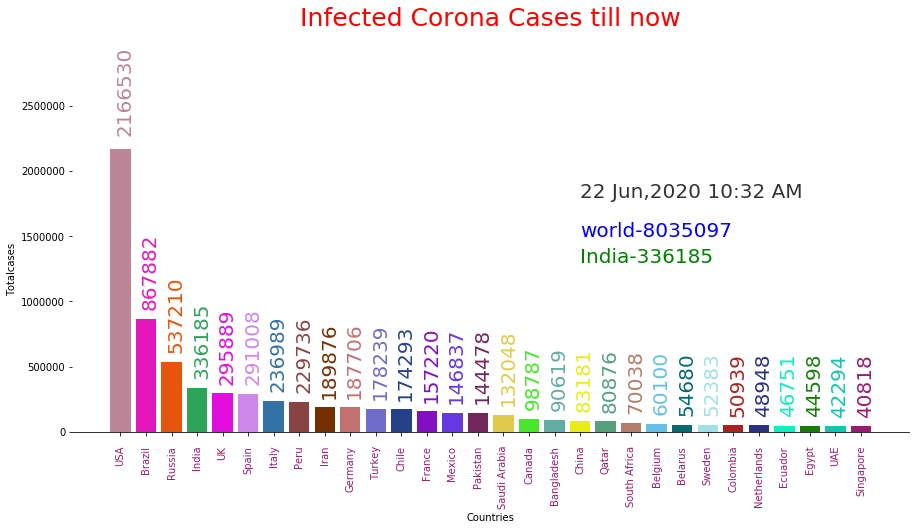

In [21]:
import time
plt.rcParams['figure.figsize']=15,6
plt.rcParams['xtick.major.pad']=10
plt.rcParams['xtick.major.pad']=10
fig,ax=plt.subplots()
ax.bar(sort_df['Country'][:30],sort_df['TotalCase'][:30],color=colors)
ax.set_xticklabels(sort_df['Country'][:30],rotation=90,color=colors)
ax.set_ylim([0,2500000])
ax.set_yticklabels(range(0,3500000,500000))
ax.set_title("Infected Corona Cases till now",fontsize=25,c='r',pad=80)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Countries")
ax.set_ylabel("Totalcases")
count=1
for p,c,l in zip(ax.patches,colors,ax.get_xticklabels()):
    x=p.get_x()+0.2
    h=p.get_height()
    y=h+100000 if count!=1 else 2300000
    if count==1:
        text=sort_df.iloc[0,1]
    else:
        text=h
    count+=1
    ax.text(x,y,text,fontsize=20,color=c,rotation=90)
    l.set_color(color)
plt.text(18,1500000,f"world-{world['TotalCase'][0]}",fontsize=20,color='blue')       
plt.text(18,1800000,f"{time.strftime('%d %b,%Y %I:%M %p')}",fontsize=20,color='#333333')
plt.text(18,1300000,f"India-{india['TotalCase'].values[0]}",fontsize=20,color='green')       
plt.show()

In [22]:
sort_df.head()

,Country,TotalCase,NewCase,TotalDeath,NewDeaths,TotalRecovered,ActiveCase,SeriousCase,TotalCase/1M,Death/1M,TotalTest,Test/1M,Population
1,USA,2166530,4302.0,117884.0,26.0,870077.0,1178569.0,16704.0,6547.0,356.0,24827229.0,75025.0,3.309176e+08
2,Brazil,867882,NaN,43389.0,NaN,453568.0,370925.0,8318.0,4084.0,204.0,1604784.0,7552.0,2.124922e+08
3,Russia,537210,8246.0,7091.0,143.0,284539.0,245580.0,2300.0,3681.0,49.0,15161152.0,103892.0,1.459319e+08
4,India,336185,3402.0,9590.0,70.0,172313.0,154282.0,8944.0,244.0,7.0,5774133.0,4186.0,1.379382e+09
5,UK,295889,NaN,41698.0,NaN,NaN,NaN,392.0,4360.0,614.0,6772602.0,99787.0,6.787049e+07


In [23]:
data.head()

,Country,TotalCase,NewCase,TotalDeath,NewDeaths,TotalRecovered,ActiveCase,SeriousCase,TotalCase/1M,Death/1M,TotalTest,Test/1M,Population
0,World,8035097,51030.0,436378.0,1197.0,4152231.0,3446488.0,54548.0,1031.0,56.0,NaN,NaN,NaN
1,USA,2166530,4302.0,117884.0,26.0,870077.0,1178569.0,16704.0,6547.0,356.0,24827229.0,75025.0,3.309176e+08
2,Brazil,867882,NaN,43389.0,NaN,453568.0,370925.0,8318.0,4084.0,204.0,1604784.0,7552.0,2.124922e+08
3,Russia,537210,8246.0,7091.0,143.0,284539.0,245580.0,2300.0,3681.0,49.0,15161152.0,103892.0,1.459319e+08
4,India,336185,3402.0,9590.0,70.0,172313.0,154282.0,8944.0,244.0,7.0,5774133.0,4186.0,1.379382e+09


In [24]:
sort_df1=df.sort_values('TotalDeath',ascending=False)

df1=sort_df1[['Country','TotalDeath']]
df1.head()

,Country,TotalDeath
1,USA,117884.0
2,Brazil,43389.0
5,UK,41698.0
7,Italy,34345.0
13,France,29407.0


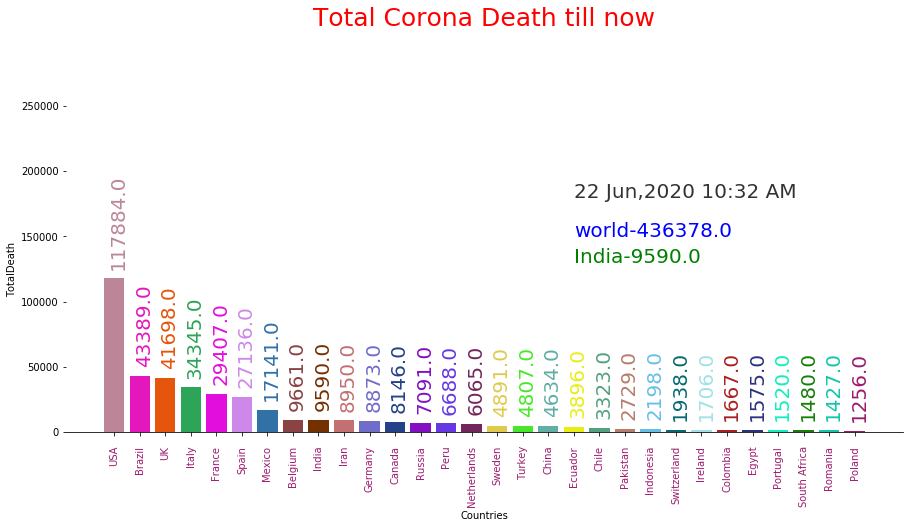

In [25]:

plt.rcParams['figure.figsize']=15,6
plt.rcParams['xtick.major.pad']=10
plt.rcParams['xtick.major.pad']=10
fig,ax=plt.subplots()
ax.bar(df1['Country'][:30],df1['TotalDeath'][:30],color=colors)
ax.set_xticklabels(df1['Country'][:30],rotation=90,color=colors)
ax.set_ylim([0,250000])
ax.set_yticklabels(range(0,350000,50000))
ax.set_title("Total Corona Death till now",fontsize=25,c='r',pad=80)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Countries")
ax.set_ylabel("TotalDeath")
count=1
for p,c,l in zip(ax.patches,colors,ax.get_xticklabels()):
    x=p.get_x()+0.2
    h=p.get_height()
    y=h+10000 
    if count==1:
        text=df1.iloc[0,1]
    else:
        text=h
    count+=1
    ax.text(x,y,text,fontsize=20,color=c,rotation=90)
    l.set_color(color)
plt.text(18,150000,f"world-{world['TotalDeath'][0]}",fontsize=20,color='blue')       
plt.text(18,180000,f"{time.strftime('%d %b,%Y %I:%M %p')}",fontsize=20,color='#333333')
plt.text(18,130000,f"India-{india['TotalDeath'].values[0]}",fontsize=20,color='green')       
plt.show()

In [26]:
df1.head()

,Country,TotalDeath
1,USA,117884.0
2,Brazil,43389.0
5,UK,41698.0
7,Italy,34345.0
13,France,29407.0


In [28]:
sort_df2=df.sort_values('NewCase',ascending=False)
sort_df3=df.sort_values('NewDeaths',ascending=False)

In [29]:
sort_df2

,Country,TotalCase,NewCase,TotalDeath,NewDeaths,TotalRecovered,ActiveCase,SeriousCase,TotalCase/1M,Death/1M,TotalTest,Test/1M,Population
3,Russia,537210,8246.0,7091.0,143.0,284539.0,245580.0,2300.0,3681.0,49.0,15161152.0,103892.0,145931893.0
15,Pakistan,144478,5248.0,2729.0,97.0,53721.0,88028.0,111.0,655.0,12.0,897650.0,4068.0,220673722.0
16,Saudi Arabia,132048,4507.0,1011.0,39.0,87890.0,43147.0,1897.0,3796.0,29.0,1126653.0,32387.0,34787354.0
1,USA,2166530,4302.0,117884.0,26.0,870077.0,1178569.0,16704.0,6547.0,356.0,24827229.0,75025.0,330917584.0
14,Mexico,146837,4147.0,17141.0,269.0,108110.0,21586.0,378.0,1139.0,133.0,406547.0,3155.0,128870121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Caribbean Netherlands,7,NaN,NaN,NaN,7.0,0.0,NaN,267.0,NaN,424.0,16176.0,26212.0
212,St. Barth,6,NaN,NaN,NaN,6.0,0.0,NaN,608.0,NaN,152.0,15391.0,9876.0
213,Lesotho,4,NaN,NaN,NaN,2.0,2.0,NaN,2.0,NaN,1515.0,707.0,2141487.0
214,Anguilla,3,NaN,NaN,NaN,3.0,0.0,NaN,200.0,NaN,93.0,6201.0,14997.0


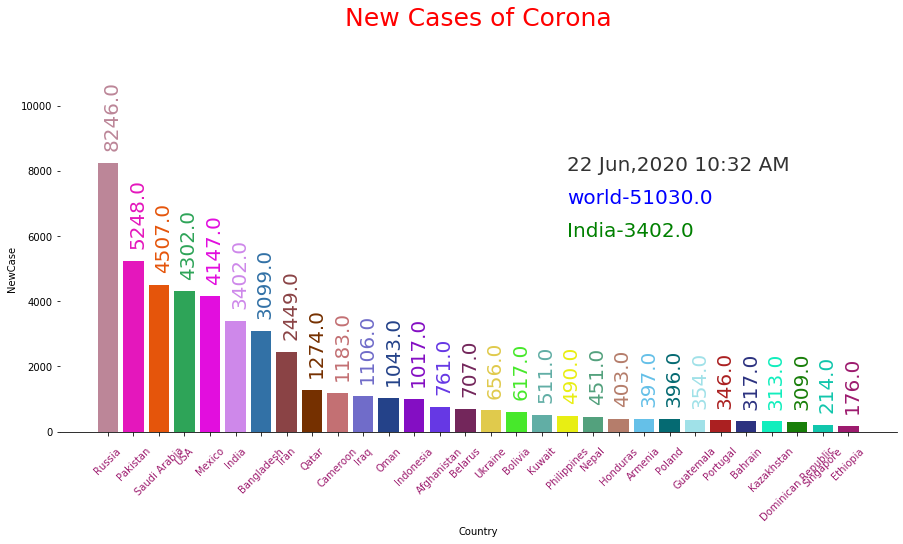

In [30]:
plt.rcParams['figure.figsize']=15,6
plt.rcParams['xtick.major.pad']=10
plt.rcParams['xtick.major.pad']=10
fig,ax=plt.subplots()
ax.bar(sort_df2['Country'][:30],sort_df2['NewCase'][:30],color=colors)
ax.set_xticklabels(sort_df2['Country'][:30],rotation=45)
ax.set_ylim(0,10000)
ax.set_title('New Cases of Corona',pad=80,fontsize=25,c='r')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Country')
ax.set_ylabel('NewCase')
count=1
for p,c,l in zip(ax.patches,colors,ax.get_xticklabels()):
    x=p.get_x()+0.2
    h=p.get_height()
    y=h+500
    if count==1:
        text=sort_df2.iloc[0,2]
    else:
        text=h
    count+=1
    ax.text(x,y,text,fontsize=20,color=c,rotation=90)
    l.set_color(color)
plt.text(18,7000,f"world-{world['NewCase'][0]}",fontsize=20,color='blue')       
plt.text(18,8000,f"{time.strftime('%d %b,%Y %I:%M %p')}",fontsize=20,color='#333333')
plt.text(18,6000,f"India-{india['NewCase'].values[0]}",fontsize=20,color='green')       
plt.show()

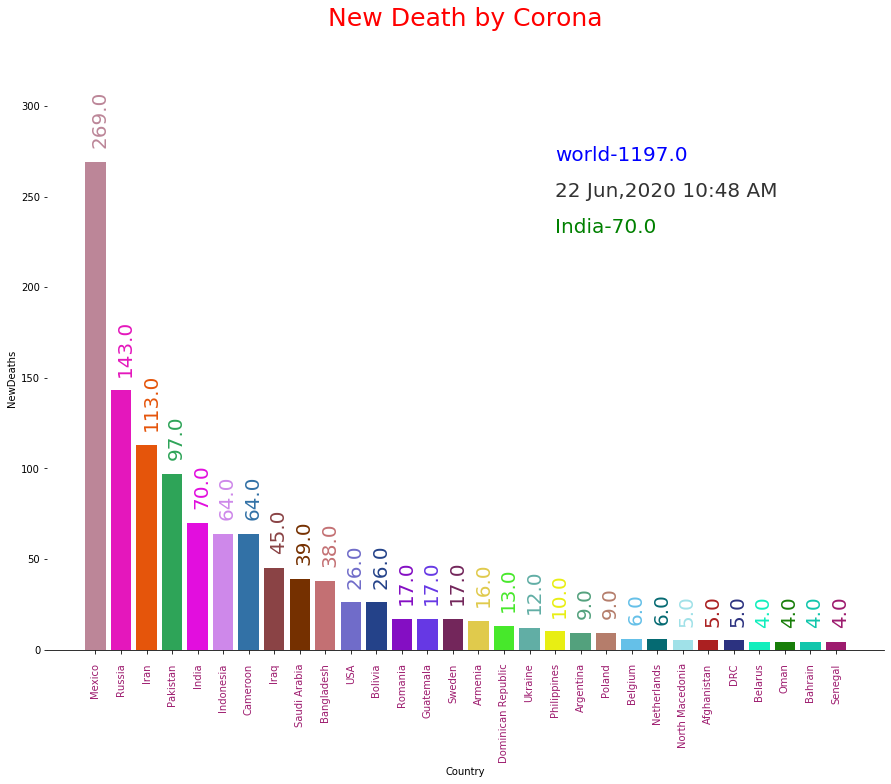

In [46]:
plt.rcParams['figure.figsize']=15,10
plt.rcParams['xtick.major.pad']=10
plt.rcParams['xtick.major.pad']=10
fig,ax=plt.subplots()
ax.bar(sort_df3['Country'][:30],sort_df3['NewDeaths'][:30],color=colors)
ax.set_xticklabels(sort_df3['Country'][:30],rotation=90)
ax.set_ylim(0,300)
ax.set_title('New Death by Corona',pad=80,fontsize=25,c='r')
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Country')
ax.set_ylabel('NewDeaths')
count=1
for p,c,l in zip(ax.patches,colors,ax.get_xticklabels()):
    x=p.get_x()+0.2
    h=p.get_height()
    y=h+10
    if count==1:
        text=sort_df3.iloc[0,4]
    else:
        text=h
    count+=1
    ax.text(x,y,text,fontsize=20,color=c,rotation=90)
    l.set_color(color)
plt.text(18,270,f"world-{world['NewDeaths'][0]}",fontsize=20,color='blue')       
plt.text(18,250,f"{time.strftime('%d %b,%Y %I:%M %p')}",fontsize=20,color='#333333')
plt.text(18,230,f"India-{india['NewDeaths'].values[0]}",fontsize=20,color='green')       
plt.show()

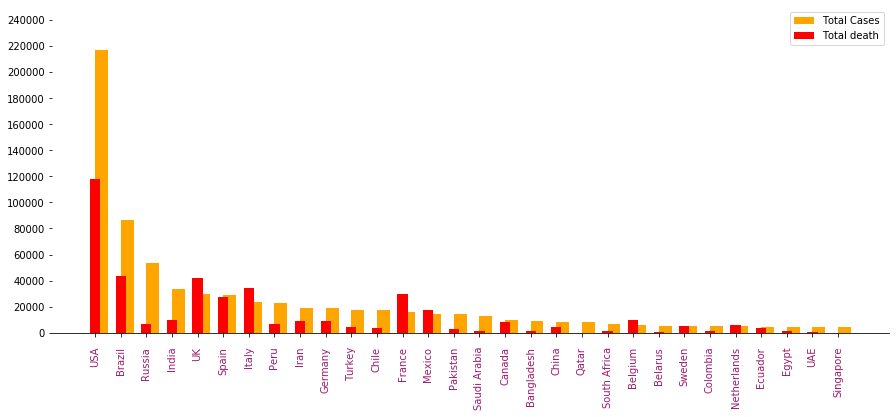

In [51]:
plt.rcParams['figure.figsize']=15,6
plt.rcParams['xtick.major.pad']=10
plt.rcParams['xtick.major.pad']=10
fig,ax=plt.subplots()
ax.bar(sort_df['Country'][:30],(sort_df['TotalCase'][:30])/10,color='orange',label='Total Cases',width=0.5,align='edge')
ax.bar(sort_df['Country'][:30],sort_df['TotalDeath'][:30],color='red',label="Total death",width=0.4)
ax.set_ylim([0,250000])
#ax.set_yticklabels([i for i in range(0,250000,20000)])
plt.yticks([i for i in range(0,250000,20000)])
ax.set_xticklabels(sort_df['Country'][:30],rotation=90,color=color)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.show()

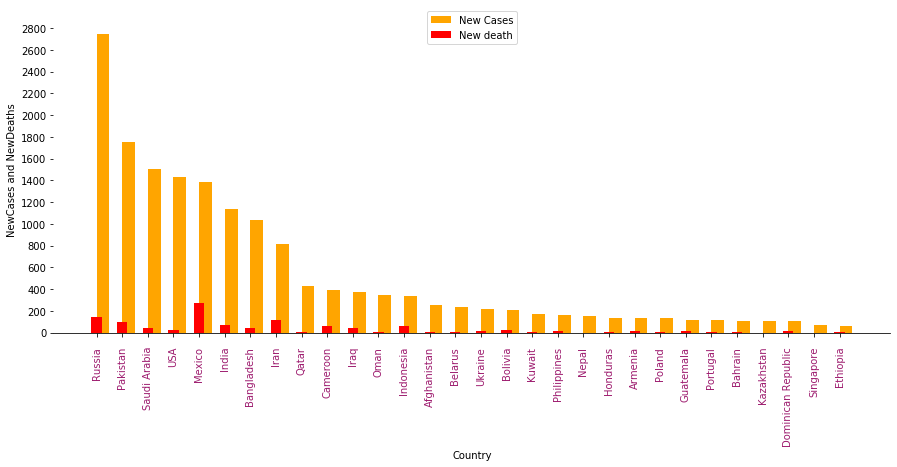

In [56]:
fig,ax=plt.subplots()
ax.bar(sort_df2['Country'][:30],(sort_df2['NewCase'][:30])/3,color='orange',label='New Cases',width=0.5,align='edge')
ax.bar(sort_df2['Country'][:30],sort_df2['NewDeaths'][:30],color='red',label="New death",width=0.4)
ax.set_ylim(0,3000)
plt.yticks([i for i in range(0,3000,200)])
ax.set_xticklabels(sort_df2['Country'][:30],rotation=90,color=color)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Country')
ax.set_ylabel('NewCases and NewDeaths')
plt.legend()
plt.show()